# Simple network creation

This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the ```Snudda/snudda/examples/notebooks``` directory, as all paths are given relative to there.

First we create a ```network-config.json``` file in ```networks/simple_example``` which is a subdirectory to the ```notebooks``` directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the ```Snudda/snudda/data/neurons/dspn``` and ```ispn``` folders.

Here we have set the ```random_seed``` to ```12345```.

In [1]:
import os
from snudda import SnuddaInit

network_path = os.path.join("networks","simple_example")
si = SnuddaInit(network_path=network_path, random_seed=12345)
si.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neurons_dir="$DATA/neurons")
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/Snudda/snudda/data/neurons/striatum/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [3]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64 (200 neurons)
Processing hyper voxel : 17/64 (177 neurons)
Processing hyper voxel : 5/64 (172 neurons)
Processing hyper voxel : 22/64 (152 neurons)
Processing hyper voxel : 20/64 (147 neurons)
Processing hyper voxel : 37/64 (124 neurons)
Processing hyper voxel : 25/64 (116 neurons)
Processing hyper voxel : 1/64 (94 neurons)
Processing hyper voxel : 16/64 (71 neurons)
Processing hyper voxel : 18/64 (71 neurons)
Processing hyper voxel : 4/64 (69 neurons)
Processing hyper voxel : 6/64 (67 neurons)
Processing hyper voxel : 9/64 (45 neurons)
Processing hyper voxel : 33/64 (45 neurons)
Processing hyper voxel : 38/64 (40 neurons)
Processing hyper voxel : 26/64 (33 neurons)
Processing hyper voxel : 0/64 (31 neurons)
Processing hyper voxel : 36/64 (29 neurons)
Processing hyper voxel : 24/64 (29 neurons)
Processing hyper voxel : 41/64 (25 neurons)
Processing hyper voxel : 2/64 (22 neurons)
Processing hyper v

Prune the synapses in the network based on the connection information in the ```network-config.json``` file.

In [4]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 579360 out of total 579360 synapses


Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading 200 neurons with 31016 synapses and 0 gap junctions


/home/hjorth/HBP/Snudda/snudda/plotting/plot_network.py:42: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


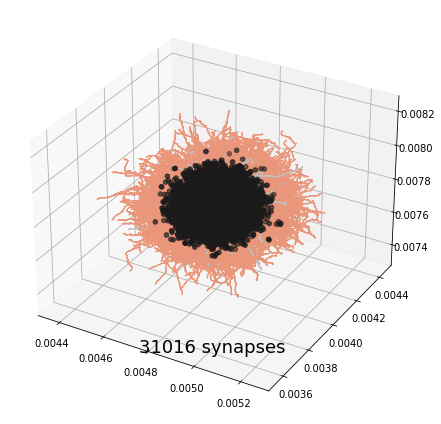

In [5]:
from snudda.plotting import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)